## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [248]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,log_loss

# Question 1

#### Read the iris.csv file

In [351]:
df_knn=pd.read_csv('iris.csv')
df_knn.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [352]:
df_knn.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [353]:
df_knn=df_knn.dropna()

In [354]:
df_knn.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [355]:
y=df_knn['Species']

In [356]:
df_knn['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [357]:
for i in range(len(y)):
    if y[i] == 'Iris-virginica':
        y[i] = 0
    if y[i] == 'Iris-setosa':
        y[i] = 1
    if y[i] == 'Iris-versicolor':
        y[i] = 2
y=y.astype('int')

In [358]:
df_knn['Species'].value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [359]:
df_knn.var()

Id              1887.500000
SepalLengthCm      0.685694
SepalWidthCm       0.188004
PetalLengthCm      3.113179
PetalWidthCm       0.582414
Species            0.671141
dtype: float64

In [360]:
df_knn=df_knn.drop('Id',axis=1)

In [361]:
df_knn['Species']=y

In [362]:
df_knn.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

<AxesSubplot:>

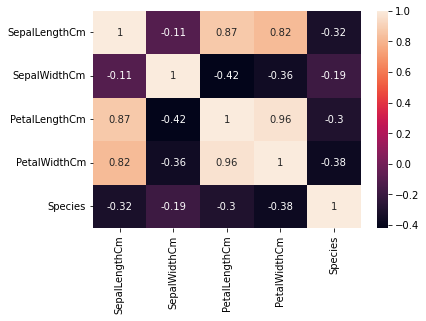

In [363]:
sns.heatmap(df_knn.corr(),annot=True)

# As we observe we can drop the variable id because it has high correlation with target variable.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [ ]:
There is no independent variables having variance zero.

In [364]:
df_knn.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,1
1,4.900000,3.000000,1.400000,0.200000,1
2,4.700000,3.200000,1.300000,0.200000,1
3,4.600000,3.100000,1.500000,0.200000,1
4,5.000000,3.600000,1.400000,0.200000,1


## Question 6

*Plot the scatter matrix for all the variables.*

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [365]:
df_feature=df_knn.drop('Species',axis=1)

In [366]:
min_max=MinMaxScaler()
min_max = min_max.fit_transform(df_feature)
X = pd.DataFrame(min_max, columns = df_feature.columns)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [367]:
y=df_knn['Species']

In [368]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
print('X_train_norm', X_train_norm.shape)
print('y_train', y_train.shape)
print('X_test_norm', X_test_norm.shape)
print('y_test', y_test.shape)

X_train_norm (120, 4)
y_train (120,)
X_test_norm (30, 4)
y_test (30,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [384]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model1 = knn_classification.fit(X_train_norm, y_train)

In [385]:
y_pred=knn_model1.predict(X_test_norm)

In [387]:
print('accuracy:',accuracy_score(y_test,y_pred)*100)

accuracy: 96.66666666666667


In [393]:
knn_classification = KNeighborsClassifier(n_neighbors = 5)
knn_model2 = knn_classification.fit(X_train_norm, y_train)
y_pred=knn_model2.predict(X_test_norm)

In [389]:
print('accuracy:',accuracy_score(y_test,y_pred)*100)

accuracy: 100.0


In [390]:
knn_classification = KNeighborsClassifier(n_neighbors = 9)
knn_model3 = knn_classification.fit(X_train_norm, y_train)
y_pred=knn_model3.predict(X_test_norm)

In [391]:
print('accuracy:',accuracy_score(y_test,y_pred)*100)

accuracy: 96.66666666666667


# based on the three models,model 2 is considered as best model as its with 100% accuracy.

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

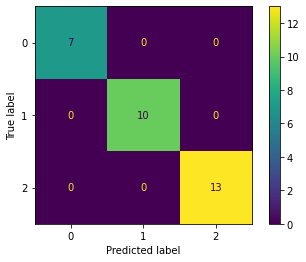

In [394]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

# The model 2 has no Misclassification error.

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# no misclassification error

# Naive Bayes

### Question 1
#### Import Iris.csv

In [227]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [228]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [229]:
df=df.dropna()

In [230]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [231]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [232]:
x=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [233]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [234]:
for i in range(len(y)):
    if y[i] == 'Iris-virginica':
        y[i] = 0
    if y[i] == 'Iris-setosa':
        y[i] = 1
    if y[i] == 'Iris-versicolor':
        y[i] = 2
y=y.astype('int')

In [235]:
df['Species'].value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

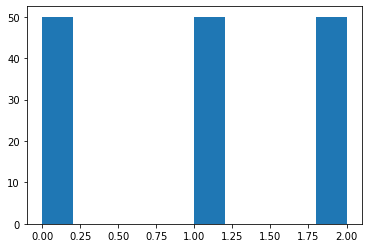

In [240]:
plt.hist(df['Species'])
plt.show()

### Plot the distribution of target variable using histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

### Question 3
#### Find Correlation among all variables and give your insights 

<AxesSubplot:>

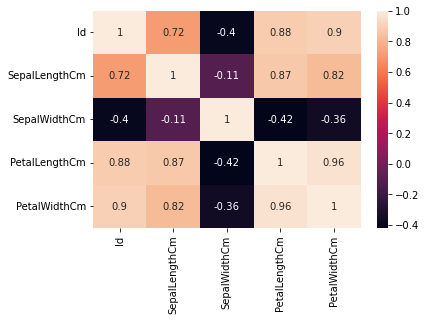

In [241]:
sns.heatmap(df.corr(),annot=True)

### Question 4
#### Split data in Training and Validation in 80:20

In [242]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=22)

### Question 5
#### Do Feature Scaling 

In [243]:
min_max=MinMaxScaler()
min_max = min_max.fit_transform(x)
X = pd.DataFrame(min_max, columns = x.columns)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### Question 6 
#### Train and Fit NaiveBayes Model

In [244]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train_norm, y_train)

In [245]:
y_pred=gnb_model.predict(X_test_norm)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

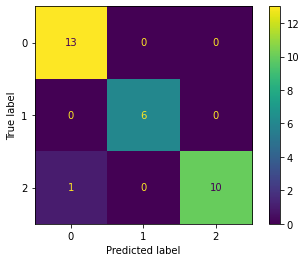

In [246]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

In [247]:
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.9666666666666667


# Intrepretation:  
   # The accuracy for the given dataset is 96%.